<a href="https://colab.research.google.com/github/pastoril10/Trabalhando_com_Seaborn/blob/main/Trabalhando_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

Importando os dados usando o pandas

In [2]:
df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Usando o relplot

Método de alto nível para visualização de relações estatísticas entre variáveis. O método relplot() já combina o scatter plot e line plots.

Muito útil para ver relações entre duas ou mais variáveis com o uso de parâmetros de semântica dos dados.

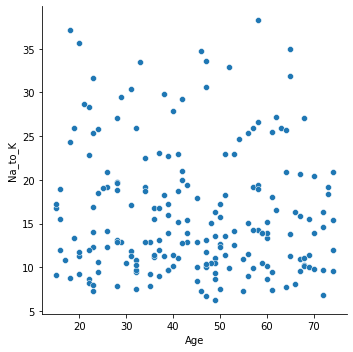

In [3]:
sns.relplot(data = df, x="Age", y="Na_to_K")

Incluindo a coluna "Sex". 

A diferença aqui é que a coloração dos pontos está variando com o sexo masculino e feminino

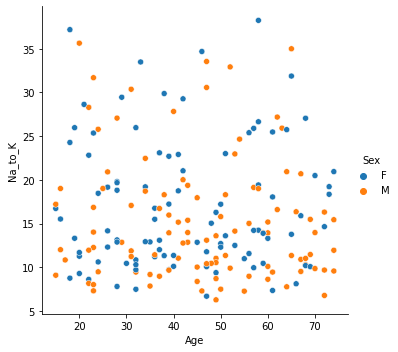

In [4]:
sns.relplot(data = df, x="Age", y="Na_to_K", hue="Sex")

Incluindo a coluna "Drug".

A diferença aqui é que o formato e a coloração dos pontos está variando com o tipo de droga

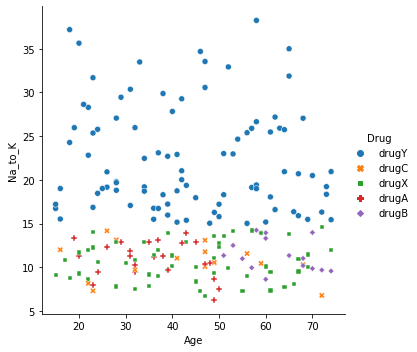

In [5]:
sns.relplot(data = df, x="Age", y="Na_to_K", hue="Drug", style = "Drug")

A diferença aqui é que o tamanho e a coloração dos pontos está variando com o tipo de droga

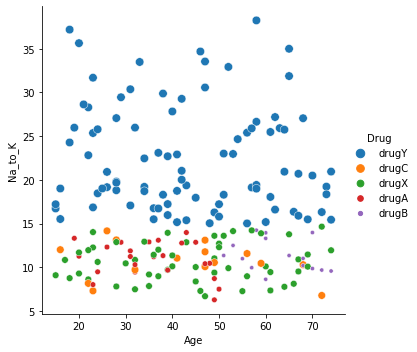

In [6]:
sns.relplot(data = df, x="Age", y="Na_to_K", hue="Drug", size = "Drug")


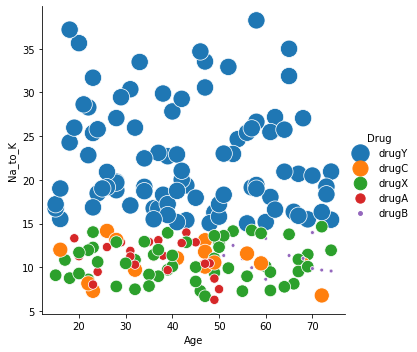

In [7]:
sns.relplot(data = df, x="Age", y="Na_to_K", hue="Drug", size = "Drug", sizes = (15,300))

## Redimensionando figuras no Seaborn e uso do Scatterplot

O seaborn herda as funções do matplotlib, permitindo que você controle o tamanho da figura, o tamanho dos eixos entre outros.

In [8]:
import matplotlib.pyplot as plt

Usando Scatterplot

Caso não queira usar o relplot() o método scatterplot() já atende perfeitamente quando queremos ver relações nos dados.

A única diferença é que o scatterplot plota gráfico de dispersão apenas, logo este não contém a função lineplot().

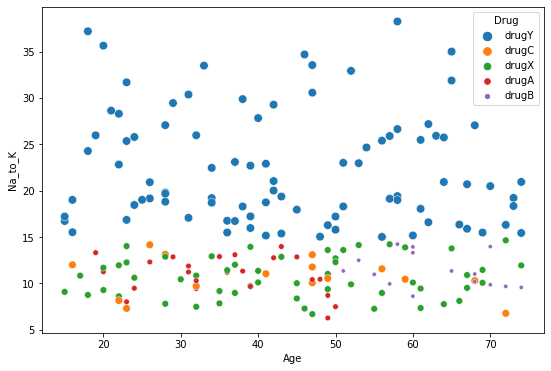

In [9]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df, x="Age", y="Na_to_K", size="Drug", hue="Drug")

## Cores no Seaborn

A função que controla as cores no seaborn e a color_palette().

Essa função fornece uma interface para gerar cores no seaborn.
Usamos esse método internamente ao usar o parâmetro palette.
O método color_palette() recebe o nome de uma paleta de cores do seaborn ou um colormap do matplotlib.

O método set_palette() recebe os mesmos parâmetros e é usado para definir um estilo padrão para todos os plots.
As cores devem ser definidas levando em consideração o tipo de dado que queremos plotar. (qualitativos, sequenciais,diverging).

Paleta de cores

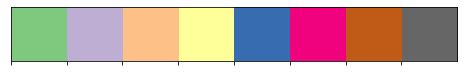

In [10]:
sns.palplot(sns.color_palette("Accent"))

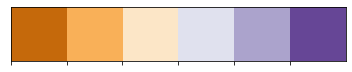

In [11]:
sns.palplot(sns.color_palette("PuOr"))

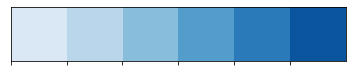

In [12]:
sns.palplot(sns.color_palette("Blues"))

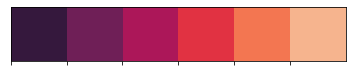

In [13]:
sns.palplot(sns.color_palette("rocket"))

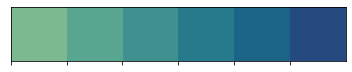

In [14]:
sns.palplot(sns.color_palette("crest"))

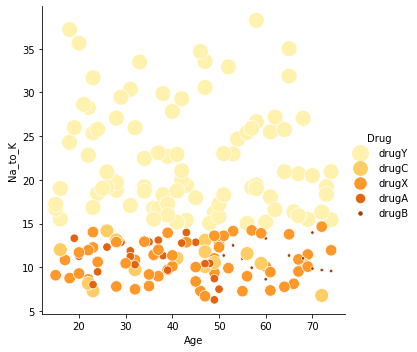

In [15]:
sns.relplot(x="Age", y="Na_to_K", hue="Drug", palette="YlOrBr", size="Drug", sizes=(12,250), data=df);

## Usando o Catplot para variaveis categóricas


Quando trabalhamos com variáveis categóricas temos que visualizar dados de formas diferentes.

O Seaborn fornece o método catplot() que já contém diversos tipos de gráficos embutidos.

Isso facilita, pois, você pode usar diferentes gráficos usando um mesmo método.

Gráfico de barras verticais


Gráfico usando a paleta de cor qualitativa “PuOr”.

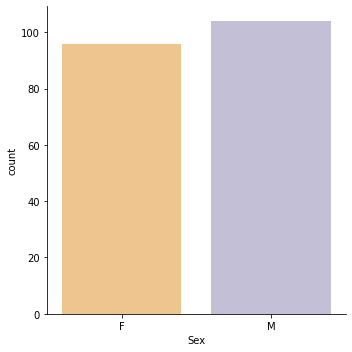

In [16]:
sns.catplot(data = df, x = "Sex", kind="count", palette="PuOr")

Gráfico de barras horizontais

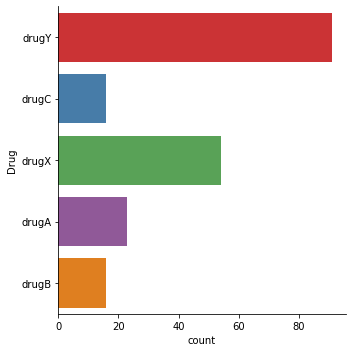

In [17]:
sns.catplot(y = "Drug", kind="count", palette="Set1",data=df)

Scatter plot com dados categóricos

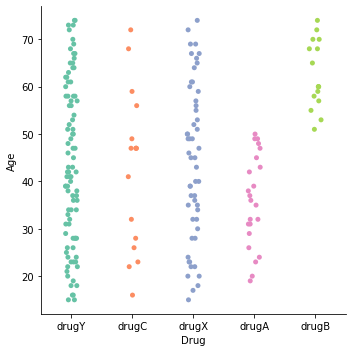

In [18]:
sns.catplot(data = df, x="Drug", y="Age", palette="Set2")

O parâmetro swarm evita sobreposição de pontos.

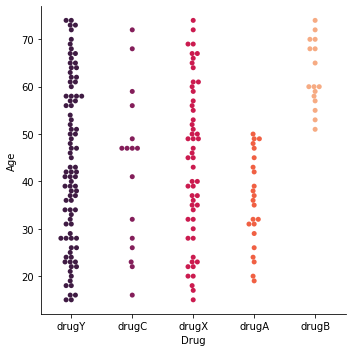

In [19]:
sns.catplot(data = df, x="Drug", y="Age", kind = "swarm", palette="rocket")

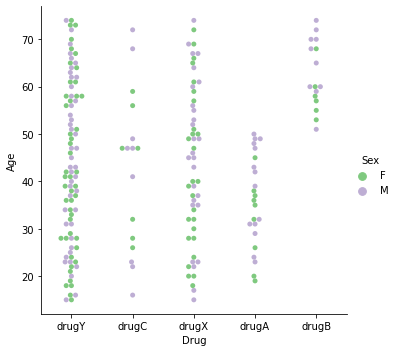

In [20]:
sns.catplot(data = df, x="Drug", y="Age", kind = "swarm", hue="Sex", palette="Accent")

O parâmetro order permite alterarmos a ordem padrão das categorias que estão sendo exibidas.
Isso é útil quando temos mais um gráfico na mesma figura e queremos manter as mesmas ordens.

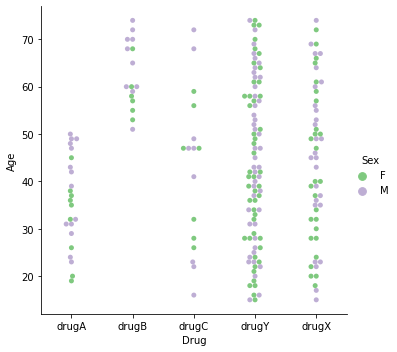

In [21]:
sns.catplot(data = df, x="Drug", y="Age", kind = "swarm", 
            hue="Sex", 
            palette="Accent", 
            order=["drugA", "drugB", "drugC", "drugY", "drugX"])

Invertendo a visualização para plots horizontais.

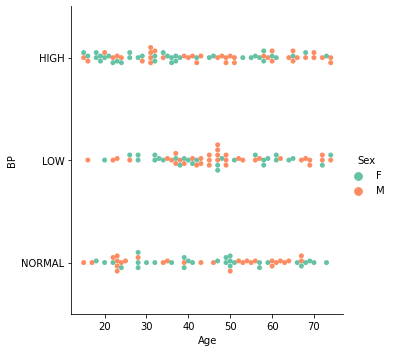

In [22]:
sns.catplot(data = df, y="BP", x="Age", kind = "swarm", 
            hue="Sex", 
            palette="Set2")

## Gráficos com Regressão

Quando temos muitas variáveis quantitativas em nossos dados é interessante visualizar como estas se relacionam.

Podemos visualizar essas informações com linhas de regressão.

Com modelos de regressão simples é possível checar se existe alguma correlação entre algumas variáveis.

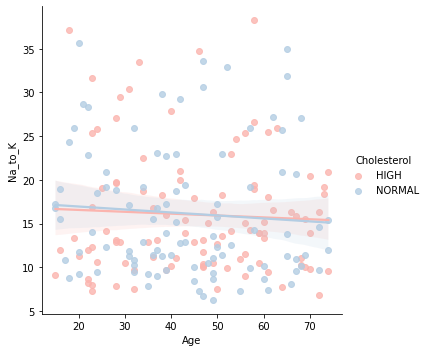

In [23]:
sns.lmplot(x= "Age", y="Na_to_K", hue="Cholesterol", palette="Pastel1", data=df);

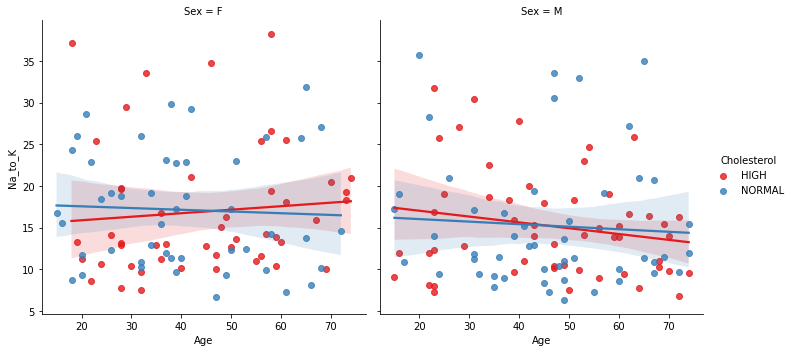

In [24]:
sns.lmplot(x= "Age", y="Na_to_K", hue="Cholesterol", col = "Sex", palette="Set1", data=df)

Parâmetros scatter_kws e line_kws.

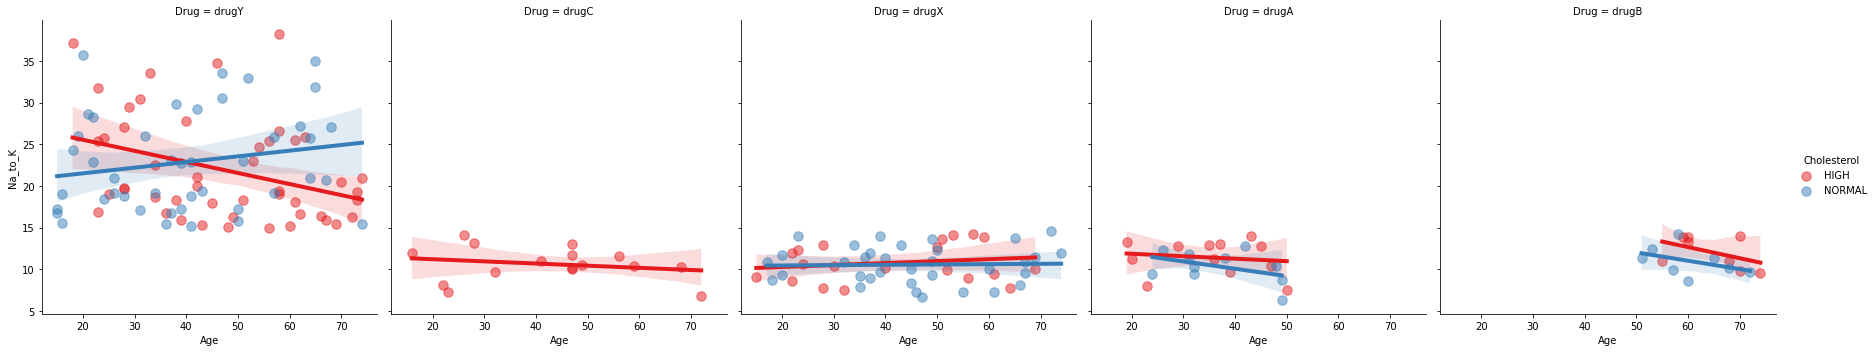

In [25]:
sns.lmplot(x= "Age", y="Na_to_K", 
           hue="Cholesterol", 
           col = "Drug", 
           palette="Set1", 
           scatter_kws={'s': 90, 'alpha': 0.5},
           line_kws={'lw': 4},
           data = df)

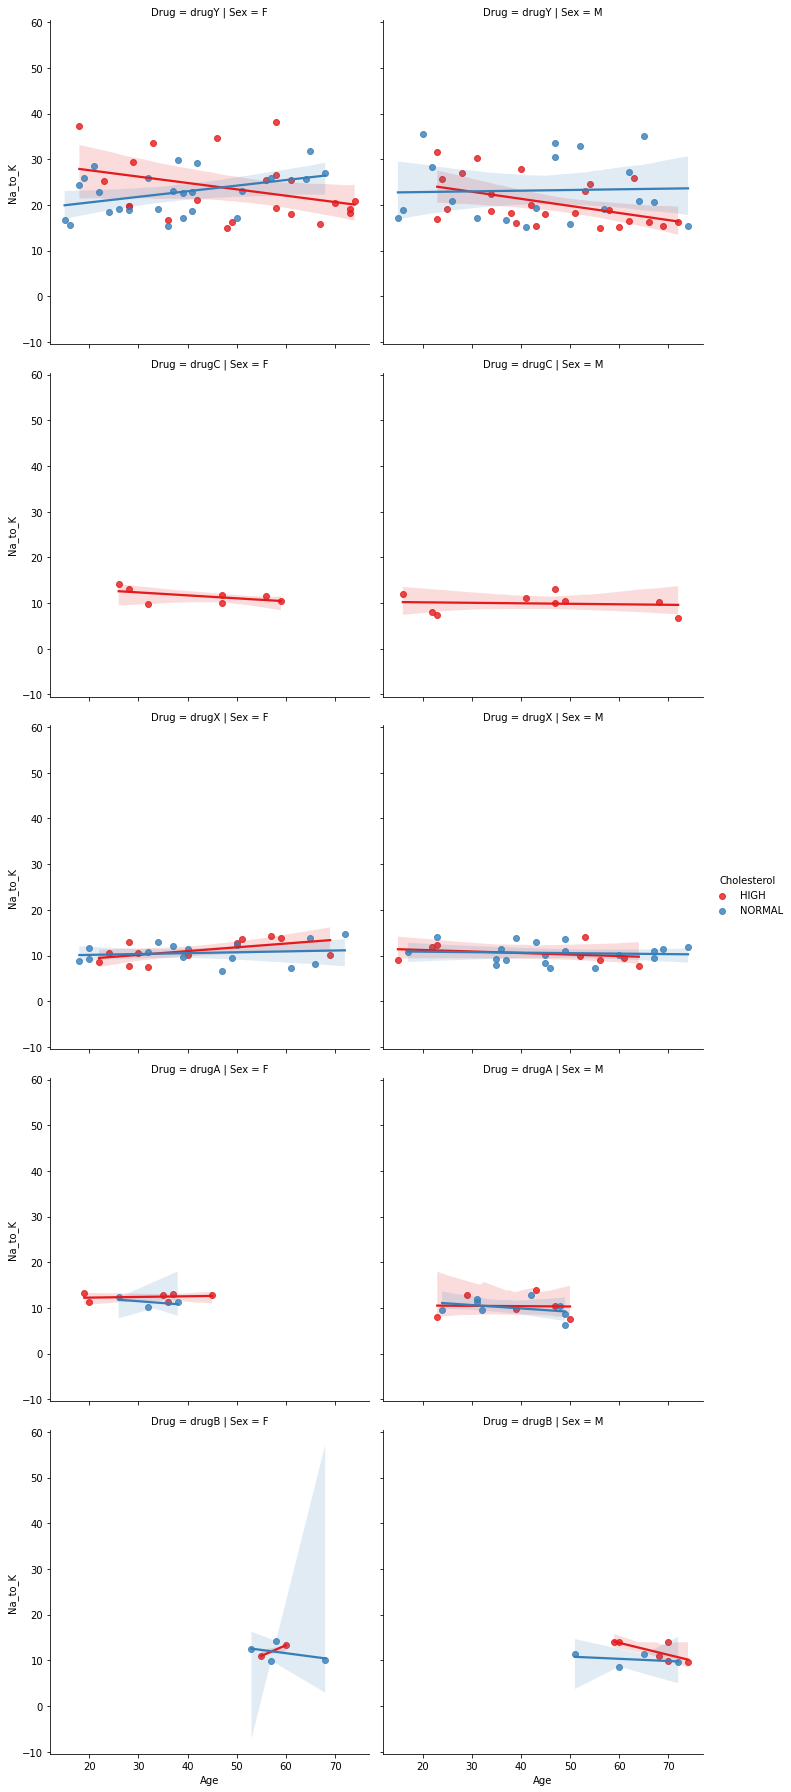

In [26]:
sns.lmplot(x= "Age", y="Na_to_K", 
           hue="Cholesterol", 
           col = "Sex", 
           row = "Drug",
           palette="Set1",
           data=df)

## Visualizando Outliers

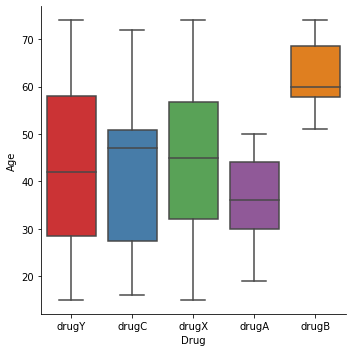

In [27]:
sns.catplot(x="Drug", y="Age", 
            kind = "box", 
            palette="Set1", data = df)

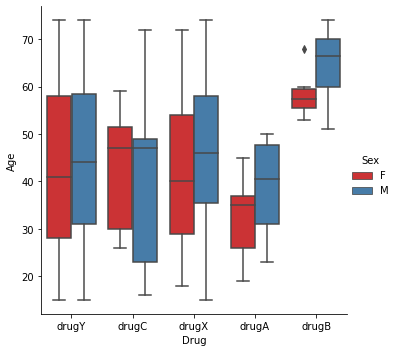

In [28]:
sns.catplot(x = "Drug", y="Age", 
             hue = "Sex",
             kind = "box",
             palette="Set1",
             data = df)

O Método stripplot permite plotar a distribuição dos dados.

Podemos combinar os dois gráficos para ter mais informação.

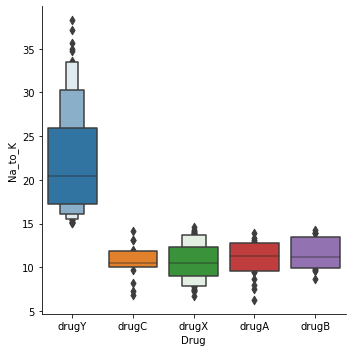

In [29]:
sns.catplot(x = "Drug", y = "Na_to_K", kind= "boxen", data=df)


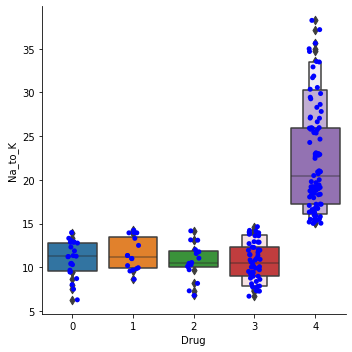

In [37]:
sns.catplot(x = "Drug", y = "Na_to_K", kind= "boxen", data=df)
sns.stripplot(x = "Drug", y = "Na_to_K", color = "b", data=df)

## Correlacionando as variaveis

In [30]:
from sklearn.preprocessing import LabelEncoder

Definindo a função que vai transformar as coluas categóricas em numérico.

In [31]:
def label_encoder(y):
  le = LabelEncoder()
  df[y] = le.fit_transform(df[y])

In [32]:
lista = ["Sex", "BP", "Cholesterol", "Drug"]

In [33]:
for l in lista:
  label_encoder(l)

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


Correlação entre as variaveis

In [35]:
correlacoes = df.corr()
correlacoes

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,-0.004828
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,-0.098573
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.372868
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.055629
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,0.589120
Drug,-0.004828,-0.098573,0.372868,0.055629,0.589120,1.000000


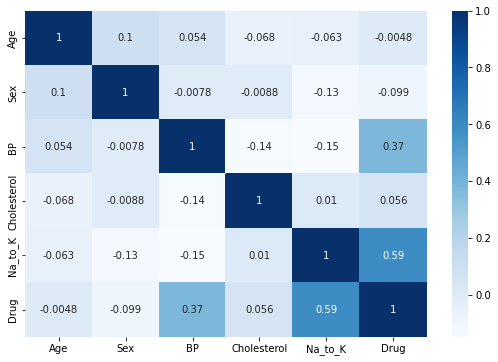

In [36]:
plt.figure(figsize=(9,6))
sns.heatmap(correlacoes, annot = True, cmap = "Blues")

plt.show()

Além da cor temos o valor da correlação o que enriquece e facilita a interpretação do gráfico. Ele aceita a customização das cores e você pode brincar com as paletas de cores conforme ensinamos durante o tutorial.